# Road Traffic Accidents Data Science Project

## Data Cleaning

In this section, we will perform preliminary data cleaning steps necessary for further analysis. These steps include removing unnecessary columns, handling missing values, converting data types, normalizing column names, and checking for duplicates.

### Step 1: Remove Unnecessary Columns

First, we'll remove columns that are not needed for our analysis to simplify the dataset.

In [25]:
import pandas as pd
file_path = '/content/data_NF.csv'
data = pd.read_csv(file_path)

# Remove unnecessary columns
columns_to_remove = ['Unnamed: 0']
data_cleaned = data.drop(columns=columns_to_remove)

# Display the first few rows of the cleaned dataset
data_cleaned.head()

,id_x,police_id,vehicule_id,assure_id,souscripteur_id,classeBonusMalus,coefBonusMalus,DATE_AFFECTATION,bonus,date_Calcule,...,numPolice,naturePolice,typePolice,dateEffetPolice,dateEcheancePolice,dateExpirationPolice,DATE_RESILIATION,Date_Suspenssion,Fraude,Nombre_Sinistre
0,32696,32700,29293,26960,26960,3,100,2017-05-11 00:00:00.000000,0,2016-05-11 00:00:00.000000,...,20115.0021718/3,R,I,2011-05-11,511.0,NaN,2017-03-07 00:00:00.000000,NaN,False,0
1,33346,33350,28891,26553,26553,1,80,2017-08-18 00:00:00.000000,0,2016-08-18 00:00:00.000000,...,20065.0016148/1,R,I,2006-08-18,818.0,NaN,2017-06-13 00:00:00.000000,NaN,False,0
2,33482,33486,29087,26754,26754,2,90,2016-09-20 00:00:00.000000,0,2016-09-20 00:00:00.000000,...,20085.0370414/3,R,I,2008-09-20,920.0,NaN,2016-12-07 00:00:00.000000,NaN,False,0
3,33496,33500,30651,28321,28321,1,80,2017-11-11 00:00:00.000000,0,2016-11-11 00:00:00.000000,...,20085.0052688/7,R,I,2008-11-11,1111.0,NaN,2017-10-06 00:00:00.000000,NaN,False,0
4,33732,33736,30930,28600,28600,1,80,2016-11-14 00:00:00.000000,0,2016-11-14 00:00:00.000000,...,20115.0058429/4,R,I,2011-11-14,1114.0,NaN,2017-01-10 00:00:00.000000,NaN,False,0


### Step 2: Handling Missing Values

Next, we'll address missing values in the dataset. Depending on the context, we may choose to fill these with appropriate values or drop the columns/rows with too many missing values.


In [26]:
# Example: Fill missing values for 'dateExpirationPolice' with a placeholder
data_cleaned['dateExpirationPolice'].fillna('Unknown', inplace=True)

# Check for remaining missing values
data_cleaned.isnull().sum()

id_x                          0
police_id                     0
vehicule_id                   0
assure_id                     0
souscripteur_id               0
classeBonusMalus              0
coefBonusMalus                0
DATE_AFFECTATION              0
bonus                         0
date_Calcule                  0
dateChangementVehicule    69286
numChassis                    0
puissanceFiscal               0
numImmatriculation            0
typeImmatriculation           0
energie                       0
dateInsertion                 0
dateAjout                     0
Marque_vehicule               0
Usage                         0
codeCompagnie                 0
codeAgence                    0
typeIntermediaire             0
numPolice                     0
naturePolice                  0
typePolice                    0
dateEffetPolice               0
dateEcheancePolice         2605
dateExpirationPolice          0
DATE_RESILIATION          63020
Date_Suspenssion          70920
Fraude  

## Handling Missing Values

Handling missing values is a crucial step in data preparation, as it directly impacts the quality of the insights derived from the data. After assessing the dataset, we've identified columns with missing values and evaluated their significance both in terms of the volume of missing data and their importance to our analysis.

### Columns with a High Volume of Missing Values

- **`dateChangementVehicule`**, **`DATE_RESILIATION`**, and **`Date_Suspenssion`** have a significant number of missing values. Given the large proportion of missing data in these columns:
  - Dropping these columns is advised if their information is not critical to our primary analysis objectives. Their high volume of missing values would introduce bias or inaccuracies if we attempted to impute or fill these gaps without a solid basis. Additionally, keeping these columns without proper treatment could distort any predictive modeling or trend analysis.
  
### Columns with a Moderate Amount of Missing Values

- **`dateEcheancePolice`** has a moderate amount of missing values. Considering its potential relevance in understanding policy renewals or expirations:
  - If the column is deemed important for temporal analysis or tracking policy lifecycle, imputing missing values using a method like forward fill (`ffill`) might be appropriate. This approach assumes that the date of echeance for a given entry might closely follow the one preceding it, which is reasonable for time-sequential data. This method helps maintain the integrity of temporal patterns without introducing undue bias.

### Decision Rationale

- **Why Drop**: Dropping columns with excessive missing values, especially when they're not central to our analysis, simplifies the dataset and focuses our resources on the most informative features. This approach is preferred when the proportion of missing data undermines the reliability of any imputation method.
  
- **Why Fill (Impute)**: For columns with fewer missing values or those critical to our analysis, imputing missing values helps preserve data integrity and allows for comprehensive analysis. Forward filling, for example, is chosen based on the assumption of temporal proximity and continuity, suitable for date fields in a dataset where entries are sequential or closely related.

In summary, the approach to handling missing values is tailored to balance data integrity, analytical completeness, and the practical significance of each column to our project's goals. This strategic handling ensures our dataset remains robust and representative for subsequent analyses.


In [27]:
import pandas as pd

# Assuming `data` is your initial DataFrame

# Step 1: Drop columns with a high volume of missing values
# These columns are deemed non-critical for our primary analysis objectives.
columns_to_drop = ['dateChangementVehicule', 'DATE_RESILIATION', 'Date_Suspenssion']
data_cleaned = data.drop(columns=columns_to_drop)

# Step 2: Handle missing values in 'dateEcheancePolice'
# This column has a moderate amount of missing values and is considered important.
# We choose to impute missing values using forward fill method, assuming temporal continuity.
data_cleaned['dateEcheancePolice'].fillna(method='ffill', inplace=True)

# Fill missing values in 'dateExpirationPolice' with a placeholder indicating unknown
data_cleaned['dateExpirationPolice'].fillna('Unknown', inplace=True)

# Verify the handling of missing values
# After this operation, 'data_cleaned' should have fewer missing values,
# and we've retained the integrity and usefulness of our dataset for analysis.
missing_values_summary = data_cleaned.isnull().sum()

# Display the summary of remaining missing values
print(missing_values_summary)

Unnamed: 0              0
id_x                    0
police_id               0
vehicule_id             0
assure_id               0
souscripteur_id         0
classeBonusMalus        0
coefBonusMalus          0
DATE_AFFECTATION        0
bonus                   0
date_Calcule            0
numChassis              0
puissanceFiscal         0
numImmatriculation      0
typeImmatriculation     0
energie                 0
dateInsertion           0
dateAjout               0
Marque_vehicule         0
Usage                   0
codeCompagnie           0
codeAgence              0
typeIntermediaire       0
numPolice               0
naturePolice            0
typePolice              0
dateEffetPolice         0
dateEcheancePolice      0
dateExpirationPolice    0
Fraude                  0
Nombre_Sinistre         0
dtype: int64


### Data Type Conversion

Convert the date columns to datetime format to facilitate time-based analysis. Ensure to adjust column names based on the current dataset structure.

In [28]:
date_columns = ['DATE_AFFECTATION', 'dateEffetPolice']  # Adjusted list of date columns

# Convert these columns to datetime format
for col in date_columns:
    if col in data_cleaned.columns:  # Check if column exists in DataFrame
        data_cleaned[col] = pd.to_datetime(data_cleaned[col], errors='coerce')

### Normalize Column Names

Standardize the column names to lowercase with underscores for easier access and manipulation.

In [29]:
data_cleaned.columns = [col.lower().replace(' ', '_') for col in data_cleaned.columns]

### Distribution of `classeBonusMalus`

This visualization explores the distribution of the `classe_bonus_malus` across the dataset, providing insights into the risk profiles within the data.

In [30]:
# Display current column names to identify the correct name for 'classe_bonus_malus'
print(data_cleaned.columns)

Index(['unnamed:_0', 'id_x', 'police_id', 'vehicule_id', 'assure_id',
       'souscripteur_id', 'classebonusmalus', 'coefbonusmalus',
       'date_affectation', 'bonus', 'date_calcule', 'numchassis',
       'puissancefiscal', 'numimmatriculation', 'typeimmatriculation',
       'energie', 'dateinsertion', 'dateajout', 'marque_vehicule', 'usage',
       'codecompagnie', 'codeagence', 'typeintermediaire', 'numpolice',
       'naturepolice', 'typepolice', 'dateeffetpolice', 'dateecheancepolice',
       'dateexpirationpolice', 'fraude', 'nombre_sinistre'],
      dtype='object')


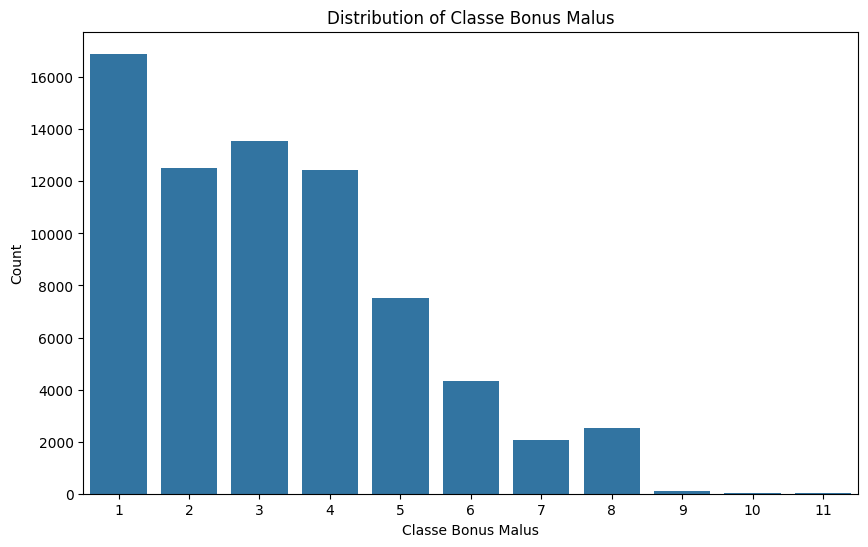

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='classebonusmalus', data=data_cleaned)
plt.title('Distribution of Classe Bonus Malus')
plt.xlabel('Classe Bonus Malus')
plt.ylabel('Count')
plt.show()

### Correlation Heatmap of Numerical Features

Identify relationships between numerical variables within the dataset, focusing on features relevant to traffic accidents and insurance metrics.

In [32]:
# List of all numerical columns in the DataFrame
numerical_columns = data_cleaned.select_dtypes(include=['number']).columns

print(numerical_columns)

Index(['unnamed:_0', 'id_x', 'police_id', 'vehicule_id', 'assure_id',
       'souscripteur_id', 'classebonusmalus', 'coefbonusmalus', 'bonus',
       'puissancefiscal', 'codecompagnie', 'codeagence', 'typeintermediaire',
       'dateecheancepolice', 'nombre_sinistre'],
      dtype='object')


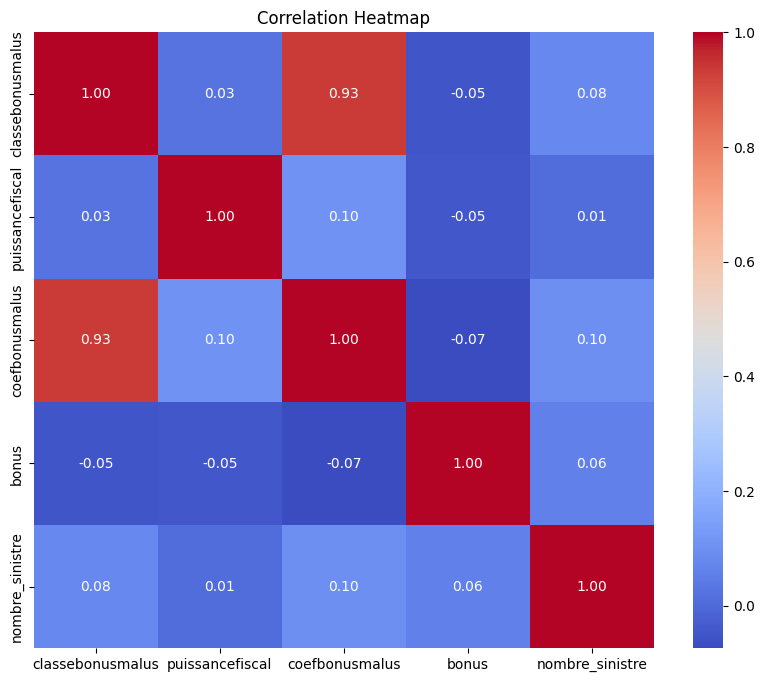

In [33]:
# Assuming 'coef_bonus_malus', 'bonus', 'malus', and 'nombre_sinistre' are key numerical columns
numerical_columns = ['classebonusmalus', 'puissancefiscal', 'coefbonusmalus', 'bonus', 'nombre_sinistre']  # Adjust based on available columns

# Calculate correlation matrix for the selected numerical columns
corr_matrix = data_cleaned[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Pie Chart of Vehicle Energy Types

This pie chart shows the distribution of vehicle energy types in the dataset. Analyzing the proportion of each energy type helps in understanding which types of vehicles are more common in our data, potentially correlating this information with accident rates, fraud cases, or other relevant factors.


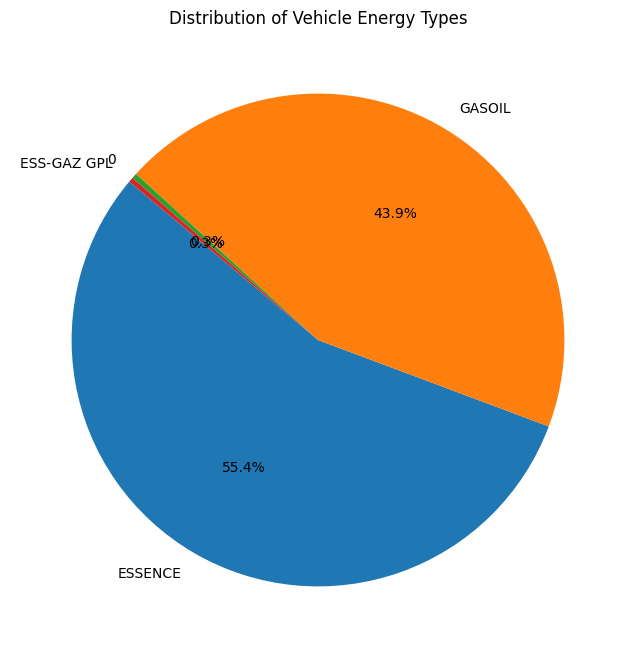

In [34]:
plt.figure(figsize=(10, 8))
data_cleaned['energie'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicle Energy Types')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()

### Bar Chart of Accidents by Vehicle Brand

This bar chart illustrates the frequency of accidents or incidents by vehicle brand. Identifying trends related to specific brands might inform risk assessment strategies, highlighting brands that are more frequently involved in accidents or claims.

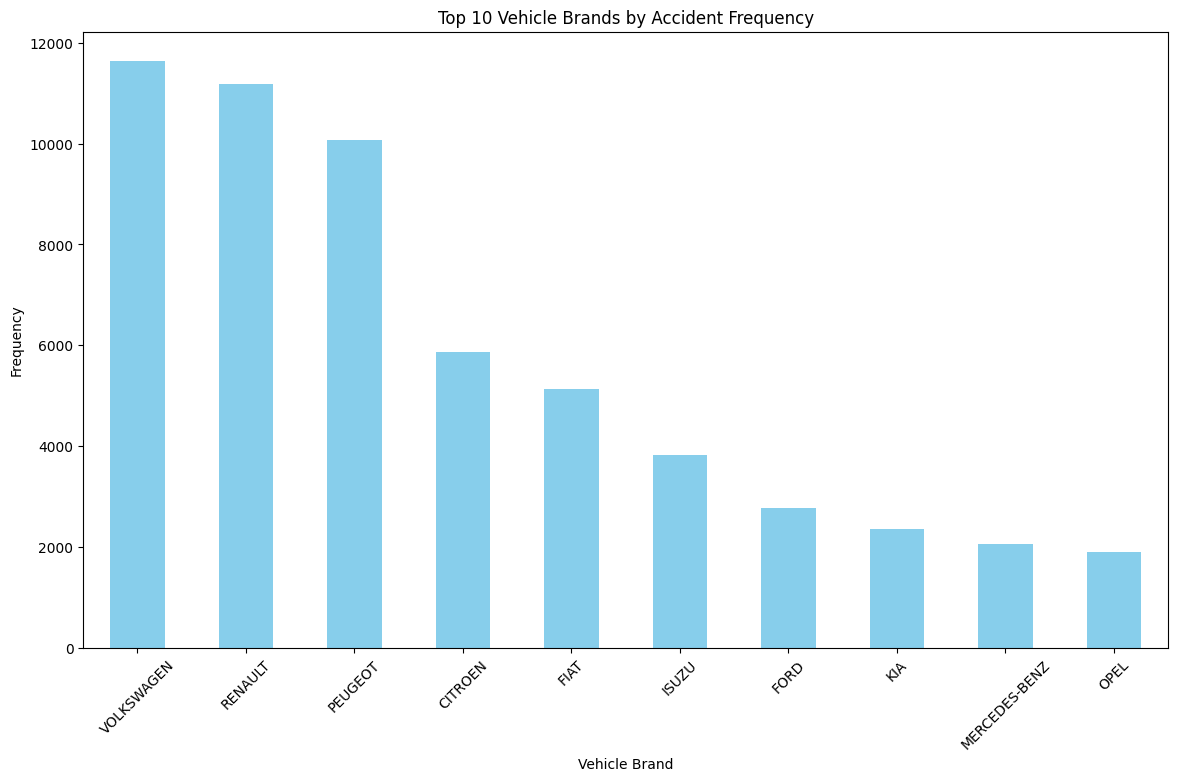

In [35]:
plt.figure(figsize=(14, 8))
data_cleaned['marque_vehicule'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Vehicle Brands by Accident Frequency')
plt.xlabel('Vehicle Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Handling Datetime Features

Machine learning models require numerical or encoded categorical data. Datetime columns in our dataset, therefore, need to be converted into a numerical format. A common approach is to extract the year, month, or day as separate features or to calculate the duration from a reference date. This step ensures our datetime information is usable for model training.

In [36]:
# Convert datetime columns to numerical features, for example, by extracting the year
data_cleaned['date_affectation_year'] = data_cleaned['date_affectation'].dt.year
data_cleaned['dateeffetpolice_year'] = data_cleaned['dateeffetpolice'].dt.year

# Now, remove the original datetime columns from the dataset to avoid the DTypePromotionError
data_cleaned.drop(['date_affectation', 'dateeffetpolice'], axis=1, inplace=True)

# Ensure all other columns are in a suitable format for modeling
# This might involve similar conversions for any other datetime columns you have

### Preparing the Data for Modeling

The first step in our modeling process involves preparing our dataset for the models. This includes encoding categorical variables to ensure our data can be effectively used in the models, and splitting the dataset into features (X) and the target (y), which in this case is `classebonusmalus`. Finally, we'll split these into training and testing sets to evaluate our models' performance accurately.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoders = {}
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns  # Adjust as necessary

for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Splitting the dataset into features and target variable
X = data_cleaned.drop('classebonusmalus', axis=1)
y = data_cleaned['classebonusmalus']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Count the occurrences of each unique value in the 'classebonusmalus' column
class_distribution = data_cleaned['classebonusmalus'].value_counts()

# Calculate the percentage of each class
class_percentage = class_distribution / class_distribution.sum() * 100

# Display the distribution and percentage of each class
print("Class Distribution:\n", class_distribution)
print("\nClass Percentage:\n", class_percentage)

Class Distribution:
 1     16903
3     13558
2     12503
4     12438
5      7538
6      4325
8      2513
7      2080
9       111
10       37
11       33
Name: classebonusmalus, dtype: int64

Class Percentage:
 1     23.463679
3     18.820361
2     17.355877
4     17.265648
5     10.463777
6      6.003692
8      3.488388
7      2.887325
9      0.154083
10     0.051361
11     0.045809
Name: classebonusmalus, dtype: float64


<ipython-input-42-0d61d51cf15b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


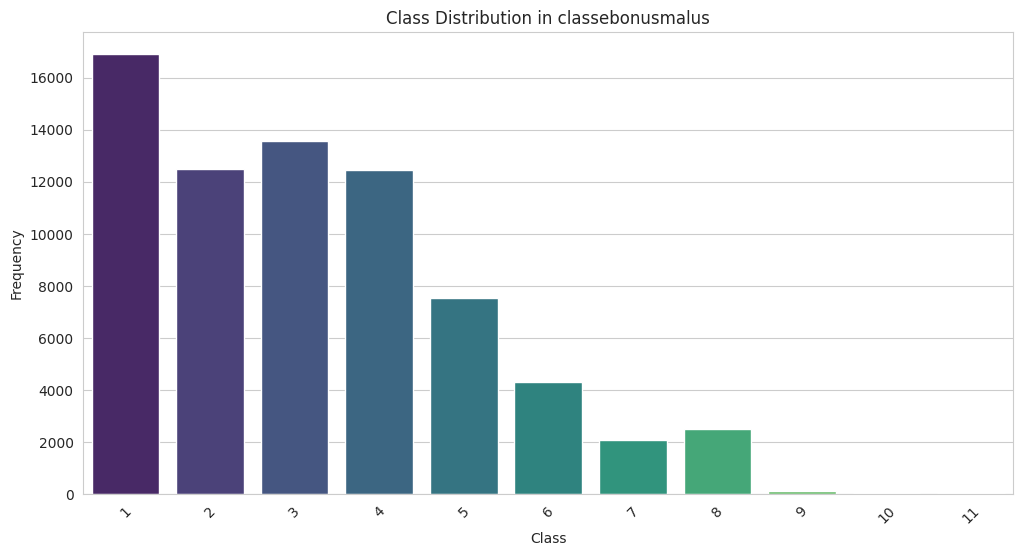

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the class distribution of 'classebonusmalus'
plt.figure(figsize=(12, 6))
class_counts = data_cleaned['classebonusmalus'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Class Distribution in classebonusmalus')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate class labels to improve readability
plt.show()

### Understanding Evaluation Metrics: Accuracy, Precision, Recall, and F1-Score

The metrics used to evaluate the models—Accuracy, Precision, Recall, and F1-Score—each provide different insights into the model's performance:

1. **Accuracy**: The simplest metric, it measures the proportion of correctly predicted observations to the total observations. It is calculated as:
   
   $$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Observations}}$$
   
   While intuitive, accuracy can be misleading in imbalanced datasets, where predicting the majority class for all observations can still lead to a high accuracy score.

2. **Precision**: Measures the proportion of correctly predicted positive observations to the total predicted positives. It's particularly important in scenarios where the cost of a false positive is high. Calculated as:
   
   $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

3. **Recall** (Sensitivity): Measures the proportion of correctly predicted positive observations to all observations in the actual class. It's crucial when the cost of a false negative is high. Calculated as:
   
   $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

4. **F1-Score**: The harmonic mean of Precision and Recall, providing a balance between the two. It is especially useful when you need to balance precision and recall, and is calculated as:
   
   $$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

These metrics collectively offer a comprehensive view of a model's performance, beyond what accuracy can provide on its own, allowing for more nuanced evaluations especially in imbalanced datasets or when specific types of prediction errors carry different costs.

### Model Training and Evaluation

In this step, we train several models on our dataset and evaluate their performance using various metrics including accuracy, precision, recall, and F1-score. This comprehensive evaluation will help us determine the best model for predicting the `classebonusmalus` column.

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

# Display the results
for model in results:
    print(f"{model} - Accuracy: {results[model]['Accuracy']:.2f}, Precision: {results[model]['Precision']:.2f}, Recall: {results[model]['Recall']:.2f}, F1-Score: {results[model]['F1-Score']:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.25, Precision: 0.18, Recall: 0.25, F1-Score: 0.17
Random Forest - Accuracy: 0.98, Precision: 0.98, Recall: 0.98, F1-Score: 0.98
Gradient Boosting - Accuracy: 0.99, Precision: 0.99, Recall: 0.99, F1-Score: 0.99
SVM - Accuracy: 0.24, Precision: 0.13, Recall: 0.24, F1-Score: 0.14


### Model Comparison and Selection

With our models trained and their performance evaluated, we now compare them across all metrics to select the best model for our needs. This comparison will consider accuracy, precision, recall, and F1-score, allowing us to choose the model that offers the best balance of these metrics for predicting the `classebonusmalus` column.

In [43]:
import pandas as pd

# Model performance metrics
model_performance = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting", "SVM"],
    "Accuracy": [0.25, 0.98, 0.99, 0.24],
    "Precision": [0.18, 0.98, 0.99, 0.13],
    "Recall": [0.25, 0.98, 0.99, 0.24],
    "F1-Score": [0.17, 0.98, 0.99, 0.14]
}

# Convert dictionary to DataFrame
model_performance_df = pd.DataFrame(model_performance)

# Display the DataFrame
model_performance_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.25,0.18,0.25,0.17
1,Random Forest,0.98,0.98,0.98,0.98
2,Gradient Boosting,0.99,0.99,0.99,0.99
3,SVM,0.24,0.13,0.24,0.14


### Why Random Forest and Gradient Boosting Outperform SVM and Logistic Regression

The significantly better performance of "Random Forest" and "Gradient Boosting" compared to "SVM" (Support Vector Machine) and "Logistic Regression" can be attributed to several factors that relate to the nature of the data and the inherent characteristics of these models:

1. **Handling Non-linear Relationships**: Random Forest and Gradient Boosting are ensemble methods that can naturally handle non-linear relationships between features and the target variable. They do this by building multiple decision trees, each capturing different aspects and patterns within the data. In contrast, standard Logistic Regression assumes a linear relationship between features and the log odds of the target, and SVM (with linear kernel) also primarily models linear boundaries unless explicitly given a non-linear kernel.

2. **Feature Interactions**: Both Random Forest and Gradient Boosting are adept at capturing complex interactions between features without needing explicit feature engineering. They do this through the hierarchical structure of decision trees. Logistic Regression and linear SVM, unless augmented with polynomial features or non-linear kernels, might miss these interactions.

3. **Robustness to Imbalanced Data**: Ensemble methods, especially Random Forest, have shown resilience to imbalanced datasets by nature of constructing multiple trees and aggregating their predictions. This can make them more effective in scenarios where classes are imbalanced, as might be the case in your dataset.

4. **Hyperparameter Tuning and Model Complexity**: Random Forest and Gradient Boosting have multiple hyperparameters that can be tuned to improve model performance significantly. While SVM and Logistic Regression also offer hyperparameter tuning, the flexibility and adaptability offered by ensemble methods through parameters like the number of trees, depth of each tree, and learning rate (for Gradient Boosting) often lead to better performance on a wider range of datasets.

5. **Generalization Ability**: Ensemble methods, particularly Gradient Boosting, are designed to sequentially correct errors of the trees that came before them (in the case of boosting) or to build a strong predictor from many weak ones (in the case of Random Forest), which can lead to a model that generalizes well to unseen data, assuming that overfitting is controlled through proper hyperparameter tuning.

In summary, while SVM and Logistic Regression can perform well in certain contexts, especially with linearly separable data or when simplicity and interpretability are prioritized, Random Forest and Gradient Boosting are often more capable of handling complex, high-dimensional, and non-linear datasets, leading to their superior performance in many classification tasks.